<a href="https://colab.research.google.com/github/cecigolazo/cursos-python/blob/master/Trabajo_final_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pobreza en Argentina**

En este trabajo se analiza la pobreza en Argentina de acuerdo a los datos de la Encuesta Permanente de Hogares (EPH). Las bases de datos que se toman en este caso son las del último trimestre del año 2022 (últimas disponibles).

De acuerdo a los ingresos de cada hogar y los datos de la canasta básica que proporciona INDEC se puede estimar el porcentaje de pobreza en Argentina.

Para calcular el ingreso del hogar se estima primero el porcentaje correspondiente al adulto equivalente en cada uno de ellos, ya que un hogar puede estar compuesto por 8 miembros y otro por solo dos, a modo e ejemplo.

En este caso, la línea de pobreza para un adulto equivalente fue de $49.358.

Las fuentes de los bases de datos son:


**Bases de datos**

https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos


**Diseño de registro y estructura para las bases**

https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf


**Canasta básica alimentaria diciembre 2022**

https://www.indec.gob.ar/uploads/informesdeprensa/canasta_01_23DF5760FF57.pdf



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings

warnings.filterwarnings('ignore')

# **Creamos el dataset**

In [ ]:
#cargamos el archivo de individuos "usu_individual_T422.csv"

from google.colab import files
uploaded  = files.upload()

Saving usu_individual_T422.csv to usu_individual_T422.csv


In [ ]:
#creamos el dataframe
df_individual = pd.read_csv("usu_individual_T422.csv", sep=';')

In [ ]:
#medimos las dimensiones
df_individual.shape

In [ ]:
#df_individual.head

In [ ]:
# le asignamos un % a cada persona que vive en el hogar según género y edad, en la variable 'AE_ctrol_ind'
#estos datos fueron proporcionados por el Instituto de Estadísticas de la Facultad de Ciencias Económicas de la UNC

condiciones = [
    (df_individual ['CH04'] >= 1) & (df_individual['CH06'] < 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 2),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 3),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 4),
    (df_individual['CH04'] >= 1 ) & ( df_individual['CH06'] == 5),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 6),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 7),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 8),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 9),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 10),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 11),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 12),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 13) & (df_individual['CH06'] <=14),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 15) & (df_individual['CH06'] <=17),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] > 75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==10),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==11),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==12),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==13),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==14),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==15),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==16),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==17),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] > 75)
    ]

opciones = [0.35,0.37,0.46,0.51,0.55,0.60,0.64,0.66,0.68,0.69,0.70,0.72,0.74,0.76,0.77,0.76,0.77,0.76,0.67,0.63,0.79,0.82,0.85,0.90,
            0.96,1.00,1.03,1.04,1.02,1.00,1.00,0.83,0.74]



In [ ]:
df_individual['AE_ctrol_ind']=np.select(condiciones,opciones)

NameError: ignored

In [ ]:
df_individual.head(5)

In [ ]:
#seleccionamos solo las columnas que nos interesan para este estudio (ver archivo "EPH_disenoreg_09 disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf")

df_personas = df_individual[['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH08','NIVEL_ED','CAT_OCUP','CAT_INAC','AE_ctrol_ind']]

In [ ]:
df_personas.head(5)

In [ ]:
#sumamos el % de cada persona que compone el hogar (las variables CODUSU y NRO_HOGAR identifican a cada hogar)

df_suma = df_personas.groupby(['CODUSU','NRO_HOGAR']).AE_ctrol_ind.sum()

In [ ]:
df_suma.head(5)

In [ ]:
df_suma.shape

In [ ]:
#unimos los dos dataframes según las variables CODUSU y NRO_HOGAR

df_personas_suma = pd.merge(df_personas, df_suma, on=['CODUSU','NRO_HOGAR'])

In [ ]:
df_personas_suma.head(5)

In [ ]:
#renombramos las columnas

df_personas_suma = df_personas_suma.rename(columns={
     'CH03':'parentesco',
     'CH04':'genero',
     'CH06':'edad',
     'CH08':'cob_medica',
     'AE_ctrol_ind_x':'AE_ctrol_ind',
     'AE_ctrol_ind_y':'AE_ctrol_ind_sum'})

In [ ]:
df_personas_suma.head(2)

In [ ]:
df_personas_suma.shape

In [ ]:
#seleccionamos solo los que cumplen la condición de jefes/as de hogar

df_personas_jefes = df_personas_suma.loc[df_personas_suma.loc[:, 'parentesco'] == 1]

In [ ]:
df_personas_jefes.head(5)

In [ ]:
#comprobamos la cantidad de filas

df_personas_jefes.shape

In [ ]:
#exportamos el dataframe como .csv
df_personas_jefes.to_csv('df_personas_jefes.csv', sep=';', index=False)

In [ ]:
#cargamos el archivo de hogares "usu_hogar_T422.csv"

from google.colab import files
uploaded  = files.upload()

In [ ]:
#creamos el dataframe hogares
df_hogares = pd.read_csv("usu_hogar_T422.csv", sep=";")

In [ ]:
#comprobamos la cantidad de filas

df_hogares.shape

Vemos que la cantidad de filas coincide con la del dataframe df_personas_jefes


In [ ]:
#unimos los dos dataframes, que tienen la misma cantidad de filas, según las variables CODUSU y NRO_HOGAR

df_dataset = pd.merge(df_hogares, df_personas_jefes, on=['CODUSU','NRO_HOGAR'])

In [ ]:
#comprobamos la cantidad de filas

df_dataset.shape

In [ ]:
df_dataset.head(2)

In [ ]:
#df_dataset = df_dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
#la variable ITF representa el monto de ingreso total familiar (ver archivo "EPH_disenoreg_09 disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf")
#a este monto lo dividimos por la suma de % de las personas que residen en el hogar para obtener el ingreso por adulto equivalente

df_dataset['adulto_equivalente']= df_dataset.apply(lambda row: row.ITF/row.AE_ctrol_ind_sum, axis=1)

In [ ]:
df_dataset['adulto_equivalente']= round(df_dataset['adulto_equivalente'], 2)

In [ ]:
df_dataset.head(5)

In [ ]:
#creamos la variable objetivo, pobreza

"""
De acuerdo con el archivo "canasta_01_23DF5760FF57" (disponible en https://www.indec.gob.ar/uploads/informesdeprensa/canasta_01_23DF5760FF57.pdf)
la canasta básica total para un adulto equivalente, para que no ingrese en la línea de pobreza, es de $49.358.

Creamos la varibale pobreza, donde todos los hogares que tengan ingresos menores a este valor son pobres.
"""

df_dataset['pobreza'] = np.where(df_dataset['adulto_equivalente']<49358,1,0)


In [ ]:
df_dataset['pobreza'].value_counts()

In [ ]:
df_dataset.head(5)

NameError: ignored

In [ ]:
df_dataset.to_csv('dataset.csv')

NameError: ignored

# **Cleaning**

In [ ]:
from google.colab import files
uploaded  = files.upload()

In [ ]:
df_dataset = pd.read_csv("dataset.csv")

In [ ]:
df_dataset = df_dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
# vemos los nombres de las columnas

"""
IV1 N(1) Tipo de vivienda ( por observación)  / IV1_Esp C(45) Otro tipo de vivienda. Especificar:
IV2 N(2) ¿Cuántos ambientes / habitaciones tiene la vivienda en total? (sin contar baño/s, cocina, pasillo/s, lavadero, garage)
IV3 N(1) Los pisos interiores son principalmente de.....  /  IV3_Esp C(45) Otro material de pisos interiores. Especificar:
IV4 N(2) La cubierta exterior del techo es de....
IV5 N(1) ¿El techo tiene cielorraso / revestimiento interior?
IV6 N(1) Tiene agua...
IV7 N(1) El agua es de...  / IV7_Esp C(45) Otra fuente. Especificar:
IV8 N(1) ¿Tiene baño / letrina?
IV9 N(1) El baño o letrina está...
IV10 N(1) El baño tiene...
IV11 N(1) El desagüe del baño es...
IV12_1 N(1) ¿La vivienda está ubicada cerca de basural/es (3 cuadras o menos)?
IV12_2 N(1) ¿La vivienda está ubicada en zona inundable (en los últimos 12 meses)?
IV12_3 N(1) ¿La vivienda está ubicada en villa de emergencia? (por observación)

II7 N(2) Régimen de tenencia
II8 N(1) Combustible utilizado para cocina

"""
col_names = df_dataset.columns

col_names

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4', 'parentesco', 'genero', 'edad', 'cob_medica',
       'NIVEL_ED', 'CAT_OCUP', 'CAT_INAC', 'AE_ctrol_ind', 'AE_ctrol_ind_sum',
       'adulto

In [ ]:
df_dataset.shape

(16740, 99)

analizamos la fuente de ingresos de los hogares pobres


In [ ]:
#creamos un diccionario con las fuentes de ingresos de cada hogar
Fuentes_Ingresos = {
    'V1': 'de lo que ganan en el trabajo',
    'V2': 'de alguna jubilación o pensión',
    'V3': 'de indemnización por despido',
    'V4': 'de seguro de desempleo',
    'V5': 'de subsidio o ayuda social (en dinero) del gobierno, iglesias, etc.',
    'V6': 'con mercaderías, ropa, alimentos del gobierno, iglesias, escuelas, etc.',
    'V7': 'con mercaderías, ropa, alimentos de familiares, vecinos u otras personas que no viven en este hogar',
    'V8': 'algún alquiler (por una vivienda, terreno, oficina, etc.) de su propiedad',
    'V9': 'ganancias de algún negocio en el que no trabajan',
    'V10': 'intereses o rentas por plazos fijos / inversiones',
    'V11': 'una beca de estudio',
    'V12': 'cuotas de alimentos o ayuda en dinero de personas que no viven en el hogar',
    'V13': 'gastar lo que tenían ahorrado',
    'V14': 'pedir préstamos a familiares / amigos',
    'V15': 'pedir préstamos a bancos, financieras, etc.',
    'V16': 'Compran en cuotas o al fiado con tarjeta de crédito o libreta',
    'V17': 'Han tenido que vender alguna de sus pertenencias',
    'V18': 'Tuvieron otros ingresos en efectivo (limosnas, juegos de azar, etc.)',
    'V19_A': 'Menores de 10 años ayudan con algún dinero trabajando',
    'V19_B': 'Menores de 10 años ayudan con algún dinero pidiendo'
}

In [ ]:
#seleccionamos los hogares pobres
df_pobres = df_dataset[df_dataset['pobreza'] == 1]

In [ ]:
#borramos los hogares con ITF = 0
df_pobres2 = df_pobres.drop(df_pobres[df_pobres['ITF']==0].index)

In [ ]:
# Creamos una lista de tuplas con la información de cada variable en los hogares pobres
data_pobres = []
for column in Fuentes_Ingresos:
    count_yes = (df_pobres2[column] == 1).sum()
    data_pobres.append((column, Fuentes_Ingresos[column], count_yes))

In [ ]:
# Ordenamos la lista de tuplas según el número total de respuestas "Sí" en los hogares pobres
data_pobres.sort(key=lambda x: x[2], reverse=True)

In [ ]:
# mostramos el nombre y la descripción de cada variable y el número total de respuestas "Sí" en los hogares pobres
for item in data_pobres:
    print('{} ({}): {}'.format(item[0], item[1], item[2]))

V1 (de lo que ganan en el trabajo): 4142
V16 (Compran en cuotas o al fiado con tarjeta de crédito o libreta): 2317
V5 (de subsidio o ayuda social (en dinero) del gobierno, iglesias, etc.): 1721
V2 (de alguna jubilación o pensión): 1405
V13 (gastar lo que tenían ahorrado): 1355
V14 (pedir préstamos a familiares / amigos): 899
V12 (cuotas de alimentos o ayuda en dinero de personas que no viven en el hogar): 639
V15 (pedir préstamos a bancos, financieras, etc.): 580
V7 (con mercaderías, ropa, alimentos de familiares, vecinos u otras personas que no viven en este hogar): 572
V17 (Han tenido que vender alguna de sus pertenencias): 552
V6 (con mercaderías, ropa, alimentos del gobierno, iglesias, escuelas, etc.): 442
V11 (una beca de estudio): 399
V8 (algún alquiler (por una vivienda, terreno, oficina, etc.) de su propiedad): 32
V4 (de seguro de desempleo): 16
V10 (intereses o rentas por plazos fijos / inversiones): 11
V18 (Tuvieron otros ingresos en efectivo (limosnas, juegos de azar, etc.))

In [ ]:
#renombramos las columnas del dataset original

df_dataset = df_dataset.rename(columns={
     'V1':'Ingresos_Trabajo',
     'V16':'Ingresos_Fiado_Cuotas',
     'V5':'Ingresos_Subs_AyudaScial',
     'V2':'Ingresos_Jub_Pen',
     'V13':'Ingresos_PrestConocidos'})


In [ ]:
# Creamos una nueva columna que represente si el hogar tiene otras fuentes de ingresos
df_dataset['otrasFuentesIngresos'] = 2

In [ ]:
# Actualizamos el valor de la columna 'otrasFuentesIngresos' para los hogares que tienen otras fuentes de ingresos
df_dataset.loc[(df_dataset[['V12', 'V15', 'V7', 'V17', 'V6', 'V11', 'V8', 'V4', 'V10', 'V18', 'V19_B', 'V3', 'V9', 'V19_A','V21','V22','V14']] == 1).any(axis=1), 'otrasFuentesIngresos'] = 1

In [ ]:
#vemos el contenido de otrasFuentesIngresos siendo 1=Sí y 2=No
df_dataset['otrasFuentesIngresos'].value_counts()

2    9312
1    7428
Name: otrasFuentesIngresos, dtype: int64

In [ ]:
#de todas las columnas que indican localización dejamos solo Aglomerado
#también quitamos año, trimestre y realizada
#la variable de ponderación
#todos los deciles
#el % individual del jefe/a que reside en el hogar
#las avriables que recién agrupamos en una sola

df_dataset = df_dataset.drop(['ANO4','TRIMESTRE','REALIZADA','REGION','MAS_500','PONDERA','DECIFR','IDECIFR','RDECIFR','GDECIFR','PDECIFR','ADECIFR','DECCFR','IDECCFR','RDECCFR','GDECCFR','PDECCFR','ADECCFR','PONDIH','AE_ctrol_ind','V12', 'V15', 'V7', 'V17', 'V6', 'V11', 'V8', 'V4', 'V10', 'V18', 'V19_B', 'V3', 'V9', 'V19_A','V21','V22','V14'], axis=1)

In [ ]:
df_dataset.shape

(16740, 63)

In [ ]:
#df_dataset.sort_values(by=['adulto_equivalente'])

In [ ]:
#correlation_matrix = df_dataset.corr()

In [ ]:
"""def format_value(value):
    if np.isnan(value):
        return ''
    else:
        return f'{value:.2f}'

fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax, annot_kws={"size": 20}, fmt='')
ax.tick_params(axis='both', labelsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
for text in ax.texts:
    text.set_text(format_value(float(text.get_text())))"""

'def format_value(value):\n    if np.isnan(value):\n        return \'\'\n    else:\n        return f\'{value:.2f}\'\n\nfig, ax = plt.subplots(figsize=(100, 100))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', ax=ax, annot_kws={"size": 20}, fmt=\'\')\nax.tick_params(axis=\'both\', labelsize=25)\nax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha=\'right\')\nax.set_yticklabels(ax.get_yticklabels(), rotation=0)\nfor text in ax.texts:\n    text.set_text(format_value(float(text.get_text())))'

In [ ]:
#guardamos el grafico
#fig.savefig('mapaCorrelacion.jpg', dpi=72)

Análisis de la variable ITF

In [ ]:
#la variable ITF representa el monto de ingreso total familiar
#analizamos sus datos

print(round(df_dataset['ITF'].describe()),2)

count      16740.0
mean      118416.0
std       126622.0
min            0.0
25%        34000.0
50%        97000.0
75%       168425.0
max      5300000.0
Name: ITF, dtype: float64 2


In [ ]:
#analizamos si hay valores 0 en la variable ITF
ITF_cero = [x for x in df_dataset['ITF'] if x == 0]
len(ITF_cero)

3739

In [ ]:
# Calcular la moda
moda = df_dataset['ITF'].mode()[0]
moda

0

In [ ]:
porcentaje_0ingresos = 3789/8208
porcentaje_0ingresos


0.4616228070175439

In [ ]:
#hay 3.739 hogares que declararon ingresos $0.
#analizamos el nivel de pobreza sin tener en cuenta estos hogares

df_dataset_sin0ingresos = df_dataset.drop(df_dataset[df_dataset['ITF']==0].index)

In [ ]:
ITF_cero = [x for x in df_dataset_sin0ingresos['ITF'] if x == 0]
len(ITF_cero)

0

In [ ]:
# Contar los valores únicos en la columna 'pobreza'
counts = df_dataset_sin0ingresos['pobreza'].value_counts()


In [ ]:
# Calcular el porcentaje de pobreza
porcentaje_pobreza = counts[1] / len(df_dataset_sin0ingresos) * 100

print(f'El porcentaje de pobreza es {porcentaje_pobreza:.2f}%')

El porcentaje de pobreza es 36.87%


In [ ]:
#la variable ITF representa el monto de ingreso total familiar
#analizamos sus datos si no tomamos en cuenta los hogares que no declaran ingresos

print(round(df_dataset_sin0ingresos['ITF'].describe()),2)

count      13001.0
mean      152471.0
std       124304.0
min          400.0
25%        80000.0
50%       120500.0
75%       194000.0
max      5300000.0
Name: ITF, dtype: float64 2


**De acuerdo a los datos brindados por INDEC, la población bajo la línea de pobreza para el periodo analizado fue de 39,2%, por lo que hay una diferencia de 2,3% con el valor obtenido.**


Hay 3.739 hogares que declararon ingresos $0, lo cual representa el 46% de los hogares pobres. En este sentido, generalmente estos hogares no se tienen en cuenta par este estudiocpero, dado el alto %, vamos a nalizar los hogares que han declarado este monto.

**Consideramos que muchas veces, dado el alto descreimiento de la población en los entes gubernamentales, los encuestados pueden no querer declarar cuáles son sus ingresos.**


In [ ]:
#analizamos la categoría de inactividad
"""
CAT_INAC
1 = Jubilado / Pensionado
2 = Rentista
3 = Estudiante
4 = Ama de casa
5 = Menor de 6 años
6 = Discapacitado
7 = Otros"""

df_dataset_sin0ingresos['CAT_INAC'].value_counts()

0    8383
1    3793
4     549
3     195
7      42
2      33
6       6
Name: CAT_INAC, dtype: int64

In [ ]:
#analizamos la categoría de ocupación
"""
CAT_OCUP
1 = Patrón
2 = Cuenta propia
3 = Obrero o empleado
4 = Trabajador familiar sin remuneración
9 = Ns./Nr"""

df_dataset_sin0ingresos['CAT_OCUP'].value_counts()


3    6194
0    4648
2    1835
1     308
4      15
9       1
Name: CAT_OCUP, dtype: int64

In [ ]:
#guardamos el dataset sin ingresos 0
df_dataset_sin0ingresos.to_csv('dataset2.csv')

#tomamos el dataset completo y analizamos la cobertura médica del jefe/a de hogar de los hogares que declararon ingresos $0




In [ ]:
new_df = df_dataset[df_dataset['ITF'] == 0]

In [ ]:
#vemos la cobretura médica de este grupo
"""
1 = Obra social (incluye PAMI)
2 = Mutual / Prepaga / Servicio de emergencia
3 = Planes y seguros públicos
4 = No paga ni le descuentan
9 = Ns./Nr.
12 = Obra social y mutual / prepaga / servicio de emergencia.
13 = Obra social y Planes y Seguros Públicos
23 = Mutual /prepaga / servicio de emergencia / Planes
 y Seguros Públicos
123 = Obra social, mutual / prepaga / servicio de emergencia y
Planes y Seguros Públicos
"""

new_df['cob_medica'].value_counts()

1     2703
4      719
2      165
12     126
3       24
9        2
Name: cob_medica, dtype: int64

In [ ]:
#vemos el nivel educativo del jefe/a de hogar de este grupo que declara ingresos 0
"""
NIVEL EDUCATIVO
1 = Primaria Incompleta (incluye educación especial)
2 = Primaria Completa
3 = Secundaria Incompleta
4 = Secundaria Completa
5 = Superior Universitaria Incompleta
6 = Superior Universitaria Completa
7 = Sin instrucción
9 = Ns./ Nr.
"""

new_df['NIVEL_ED'].value_counts()

6    1046
4     919
2     645
3     485
5     428
1     194
7      22
Name: NIVEL_ED, dtype: int64

In [ ]:
#analizamos el nivel educativo de las personas que no declaran ingresos y tienen Nivel de Estudios Superior Universitaria Completa
filtered_df = df_dataset[(df_dataset['ITF'] == 0) & (df_dataset['NIVEL_ED'] == 6)]
filtered_df['cob_medica'].value_counts()


1     867
2      67
12     62
4      47
3       3
Name: cob_medica, dtype: int64

In [ ]:
#analizamos el nivel educativo de las personas que no declaran ingresos y tienen Nivel de Estudios Superior Universitaria Incompleta
filtered_df = df_dataset[(df_dataset['ITF'] == 0) & (df_dataset['NIVEL_ED'] == 5)]
filtered_df['cob_medica'].value_counts()

1     304
4      66
2      36
12     18
3       3
9       1
Name: cob_medica, dtype: int64

==============================================================

**analizamos el nuevo dataset (sin hogares que con $0 ingresos)**


In [ ]:
df_dataset2 = pd.read_csv("dataset2.csv")

In [ ]:
df_dataset2 = df_dataset2.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13001 entries, 0 to 13000
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CODUSU                    13001 non-null  object 
 1   NRO_HOGAR                 13001 non-null  int64  
 2   AGLOMERADO                13001 non-null  int64  
 3   IV1                       13001 non-null  int64  
 4   IV1_ESP                   34 non-null     object 
 5   IV2                       13001 non-null  int64  
 6   IV3                       13001 non-null  int64  
 7   IV3_ESP                   18 non-null     object 
 8   IV4                       13001 non-null  int64  
 9   IV5                       13001 non-null  int64  
 10  IV6                       13001 non-null  int64  
 11  IV7                       13001 non-null  int64  
 12  IV7_ESP                   17 non-null     object 
 13  IV8                       13001 non-null  int64  
 14  IV9   

In [ ]:
df_dataset2.shape

(13001, 63)

In [ ]:
#df_dataset.sort_values(by=['adulto_equivalente'])

**Variables numéricas**

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
#Analizamos las variables numéricas

numerical = [var for var in df_dataset2.columns if df_dataset2[var].dtype!='O']
# view summary statistics in numerical variables
print(round(df_dataset2[numerical].describe()),2)


       NRO_HOGAR  AGLOMERADO      IV1      IV2      IV3      IV4      IV5  \
count    13001.0     13001.0  13001.0  13001.0  13001.0  13001.0  13001.0   
mean         1.0        24.0      1.0      3.0      1.0      3.0      1.0   
std          2.0        19.0      1.0      2.0      0.0      2.0      0.0   
min          1.0         2.0      1.0      1.0      1.0      1.0      1.0   
25%          1.0        12.0      1.0      2.0      1.0      1.0      1.0   
50%          1.0        22.0      1.0      3.0      1.0      2.0      1.0   
75%          1.0        32.0      1.0      4.0      1.0      4.0      1.0   
max         71.0        93.0      6.0     99.0      4.0      9.0      2.0   

           IV6      IV7      IV8      IV9     IV10     IV11   IV12_1   IV12_2  \
count  13001.0  13001.0  13001.0  13001.0  13001.0  13001.0  13001.0  13001.0   
mean       1.0      1.0      1.0      1.0      1.0      1.0      2.0      2.0   
std        0.0      0.0      0.0      0.0      0.0      1.0    

In [ ]:
#analizamos la moda

df_dataset2[numerical].mode()

,NRO_HOGAR,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II8,II9,Ingresos_Trabajo,Ingresos_Jub_Pen,Ingresos_Subs_AyudaScial,Ingresos_PrestConocidos,Ingresos_Fiado_Cuotas,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,IPCF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza,otrasFuentesIngresos
0,1,33,1,3,1,4,1,1,1,1,1,1,1,2,2,2,3,1,2,0,1,2,2,2,0,2,0,1,1,1,1,2,2,2,1,2,0,2,100000,50000.0,1,0,98,0,0,0,1,1,45,1,4,3,0,1.0,100000.0,0,2


**Outliers**

In [ ]:
#En análisis de las variables numéricas vimos que IV2 e II1 tienen un máximo que quizás esté fuera de rango

#IV2 es la cantidad de habitaciones por hogar

df_dataset2['IV2'].value_counts()

3     4694
2     3367
4     2608
1     1211
5      783
6      241
7       61
8       25
99       6
9        5
Name: IV2, dtype: int64

Text(0.5, 1.0, 'Boxplot de cantidad de ambientes por hogar')

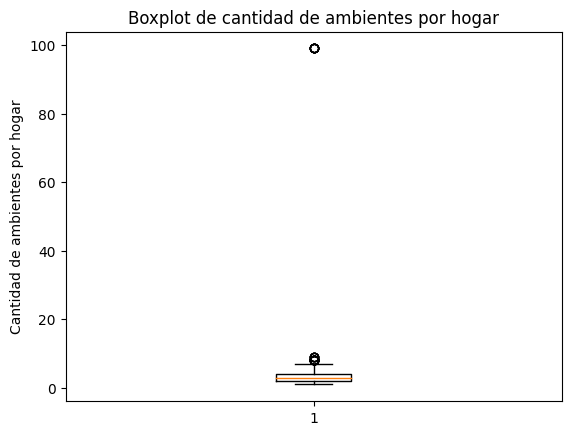

In [ ]:
plt.boxplot(df_dataset['IV2'])
plt.ylabel("Cantidad de ambientes por hogar")
plt.title("Boxplot de cantidad de ambientes por hogar")

In [ ]:
#acotamos el rango de 1 a 10

df_dataset2['IV2'] = df_dataset['IV2'].clip(lower=1,upper = 10)

In [ ]:
df_dataset2['IV2'].describe()

count    13001.000000
mean         3.004307
std          1.189692
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: IV2, dtype: float64

In [ ]:
#II1 es la cantidad de habitaciones que usan para dormir por hogar

df_dataset2['II1'].value_counts()

3     4674
2     3403
4     2571
1     1306
5      737
6      216
7       52
8       16
0       15
99       6
9        5
Name: II1, dtype: int64

Text(0.5, 1.0, 'Boxplot de cantidad de ambientes que usan para dormir por hogar')

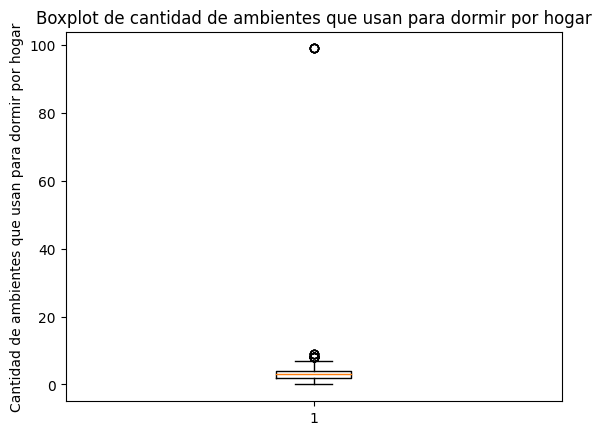

In [ ]:
plt.boxplot(df_dataset2['II1'])
plt.ylabel("Cantidad de ambientes que usan para dormir por hogar")
plt.title("Boxplot de cantidad de ambientes que usan para dormir por hogar")

In [ ]:
#acotamos el rango de 1 a 10

df_dataset2['II1'] = df_dataset['II1'].clip(lower=1,upper = 10)

In [ ]:
df_dataset2['II1'].describe()

count    13001.000000
mean         2.967541
std          1.178079
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: II1, dtype: float64

**Nulos**

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
nulos = df_dataset2.isnull().sum()

In [ ]:
nulos

CODUSU                          0
NRO_HOGAR                       0
AGLOMERADO                      0
IV1                             0
IV1_ESP                     12967
IV2                             0
IV3                             0
IV3_ESP                     12983
IV4                             0
IV5                             0
IV6                             0
IV7                             0
IV7_ESP                     12984
IV8                             0
IV9                             0
IV10                            0
IV11                            0
IV12_1                          0
IV12_2                          0
IV12_3                          0
II1                             0
II2                             0
II3                             0
II3_1                           0
II4_1                           0
II4_2                           0
II4_3                           0
II5                             0
II5_1                           0
II6           

In [ ]:
# vemos que las variables que tienen valores nulos son
#IV1_ESP, IV3_ESP, IV7_ESP, II7_ESP, II8_ESP

#analizamos la cantidad que hay en cada una de ellas

df_dataset2[['IV1_ESP','IV3_ESP','IV7_ESP','II7_ESP','II8_ESP']].notnull().sum()


IV1_ESP     34
IV3_ESP     18
IV7_ESP     17
II7_ESP     21
II8_ESP    120
dtype: int64

In [ ]:
"""
La variable IV3 identifica los pisos y va los valores desde el 1 al 4.
Este último refiere a "otro" y en IV3_ESP se especifica la misma.

La variable IV7 es la fuente del agua y va del 1 al 4.
Este último refiere a "otro" y en IV_ESP se especifica la misma.

a variable II7 es el régimen de tenencia de la propiedad y va del 1 al 9.
Este último refiere a "otro" y en II7_ESP se especifica la misma.
"""
# dada la escasa cantidad de valores presentes en estas variables no las vamos a tener en cuenta en este estudio

df_dataset2 = df_dataset2.drop(['IV3_ESP','IV7_ESP','II7_ESP'], axis=1)

In [ ]:
df_dataset2.shape

(13001, 60)

In [ ]:
"""
La variable IV1 refiere al tipo de vivienda y tiene los valores desde el 1 al 6.
Este último refiere a "otro" y en IV1_ESP se especifica la misma.
"""

# chequeamos cuántas veces aparece un valor en IV1

df_dataset2['IV1'].value_counts()

1    10209
2     2693
3       44
6       34
4       14
5        7
Name: IV1, dtype: int64

In [ ]:
df_dataset2['IV1_ESP'].value_counts()

casilla                13
CASILLA                12
CASILLA DE MADERA       4
MONO AMBIENTE           2
EN LUGAR DE TRABAJO     2
no especifica           1
Name: IV1_ESP, dtype: int64

In [ ]:
condiciones1 = [
    (df_dataset2['IV1_ESP'] == 'casilla') | (df_dataset2['IV1_ESP'] == 'CASILLA') | (df_dataset2['IV1_ESP'] == 'CASILLA DE MADERA'),
    (df_dataset2['IV1_ESP'] == 'MONO AMBIENTE'),
    (df_dataset2['IV1_ESP'] == 'EN LUGAR DE TRABAJO'),
    (df_dataset2['IV1_ESP'] == 'no especifica')
     ]

opciones1 = [7,2,5,6]

In [ ]:
df_dataset2['IV1_ESP']=np.select(condiciones1,opciones1)

In [ ]:
df_dataset2['IV1_ESP'].value_counts()

0    12967
7       29
2        2
5        2
6        1
Name: IV1_ESP, dtype: int64

In [ ]:
condiciones1b = [
    (df_dataset2['IV1'] == 1),
    (df_dataset2['IV1'] == 2),
    (df_dataset2['IV1'] == 3),
    (df_dataset2['IV1'] == 4),
    (df_dataset2['IV1'] == 5),
    (df_dataset2['IV1'] == 6) & (df_dataset2['IV1_ESP'] == 7),
    (df_dataset2['IV1'] == 6) & (df_dataset2['IV1_ESP'] == 2),
    (df_dataset2['IV1'] == 6) & (df_dataset2['IV1_ESP'] == 5),
    (df_dataset2['IV1'] == 6) & (df_dataset2['IV1_ESP'] == 6)
     ]

opciones1b = [1,2,3,4,5,7,2,5,6]

In [ ]:
df_dataset2['IV1']=np.select(condiciones1b,opciones1b)

In [ ]:
# chequeamos cuántas veces aparece un valor en IV1
"""Ahora los códigos son:
1 = Casa
2 = Departamento
3 = Pieza de inquilinato
4 = Pieza en hotel / pensión
5 = Local no construido para habitación
6 = Otros
7 = Casilla
"""

df_dataset2['IV1'].value_counts()

1    10209
2     2695
3       44
7       29
4       14
5        9
6        1
Name: IV1, dtype: int64

In [ ]:
# borramos la variable IV1_ESP

df_dataset2 = df_dataset2.drop(['IV1_ESP'], axis=1)

In [ ]:
"""
La variable II8 es el combustible usado para cocina y va del 1 al 4.
Este último refiere a "otro" y en II8_ESP se especifica la misma.
"""
# chequeamos cuántas veces aparece un valor en II8

df_dataset2['II8'].value_counts()

1    8014
2    4819
4     120
3      33
0      15
Name: II8, dtype: int64

In [ ]:
df_dataset2['II8_ESP'].value_counts()

ELECTRICIDAD                                     35
electricidad                                     32
ELECTRICO                                        20
electrico                                        10
ELECTRICA                                         5
COCINA ELECTRICA                                  3
cocina electrica                                  1
NO COCINA SU FAMILIA LE ALCANZA LA COMIDA O L     1
electrica                                         1
electricidad y gas de garrafa                     1
electrico   anafe                                 1
PIDE VIANDA                                       1
lena                                              1
NO COCINA PAGA PENSION                            1
CALENTADOR ELECTRICO                              1
NO COCINA                                         1
utiliza la cocina de la madre                     1
ninguno                                           1
elctricidad                                       1
zepelin     

In [ ]:
condiciones = [
    (df_dataset2['II8_ESP'] == 'ELECTRICIDAD') | (df_dataset2['II8_ESP'] == 'electricidad') | (df_dataset2['II8_ESP'] == 'ELECTRICO'),
     (df_dataset2['II8_ESP'] == 'ELECTRICA') | (df_dataset2['II8_ESP'] == 'COCINA ELECTRICA') | (df_dataset2['II8_ESP'] == 'electrico'),
      (df_dataset2['II8_ESP'] == 'cocina electrica ') | (df_dataset2['II8_ESP'] == 'electricO') | (df_dataset2['II8_ESP'] == 'CALENTADOR ELECTRICO'),
       (df_dataset2['II8_ESP'] == 'elctricidad') | (df_dataset2['II8_ESP'] == 'electico'),
        (df_dataset2['II8_ESP'] == 'zepelin'),
         (df_dataset2['II8_ESP'] == 'UTILIZAR GAS DE RED EN OTRA VIVIENDA') | (df_dataset2['II8_ESP'] == 'utiliza la cocina de la madre'),
          (df_dataset2['II8_ESP'] == 'electricidad y gas de garrafa'),
           (df_dataset2['II8_ESP'] == 'electrico   anafe'),
            (df_dataset2['II8_ESP'] == 'lena'),
             (df_dataset2['II8_ESP'] == 'NO COCINA PAGA PENSION') | (df_dataset2['II8_ESP'] == 'NO COCINA SU FAMILIA LE ALCANZA LA COMIDA O L') | (df_dataset2['II8_ESP'] == 'no sabe') | (df_dataset2['II8_ESP'] == 'ninguno') | (df_dataset2['II8_ESP'] == 'especificar') | (df_dataset2['II8_ESP'] == 'PIDE VIANDA'),
     ]

opciones = [5,5,5,5,4,1,2,5,4,4]

In [ ]:
df_dataset2['II8_ESP']=np.select(condiciones,opciones)

In [ ]:
df_dataset2['II8_ESP'].value_counts()

0    12884
5      108
4        7
1        1
2        1
Name: II8_ESP, dtype: int64

In [ ]:
condicionesb = [
    (df_dataset2['II8'] == 0),
    (df_dataset2['II8'] == 1),
    (df_dataset2['II8'] == 2),
    (df_dataset2['II8'] == 3),
    (df_dataset2['II8'] == 4) & (df_dataset2['II8_ESP'] == 0),
    (df_dataset2['II8'] == 4) & (df_dataset2['II8_ESP'] == 1),
    (df_dataset2['II8'] == 4) & (df_dataset2['II8_ESP'] == 2),
    (df_dataset2['II8'] == 4) & (df_dataset2['II8_ESP'] == 4),
    (df_dataset2['II8'] == 4) & (df_dataset2['II8_ESP'] == 5)

    ]

opcionesb = [4,1,2,3,5,1,2,4,5]

In [ ]:
df_dataset2['II8']=np.select(condicionesb,opcionesb)

In [ ]:
# chequeamos cuántas veces aparece un valor en II8
"""Ahora los códigos son:
1 = Gas de red
2 = Gas de tubo / garrafa
3 = Kerosene / leña/ carbón
4 = Otros
5 = Electricidad
"""

df_dataset2['II8'].value_counts()

1    8015
2    4820
5     111
3      33
4      22
Name: II8, dtype: int64

In [ ]:
# borramos la variable II8_ESP

df_dataset2 = df_dataset2.drop(['II8_ESP'], axis=1)

**Columnas que tienen valores 0 (que no corresponde)**

In [ ]:
# buscamos las variables que tienen como mínimo 0

minimo_cero = [var for var in df_dataset2.columns if df_dataset2[var].min() == 0]

print('Hay {} variables con mínimo cero\n'.format(len(minimo_cero)))

print('Las variables con mínimo cero son:', minimo_cero)

Hay 26 variables con mínimo cero

Las variables con mínimo cero son: ['IV1', 'IV9', 'IV10', 'IV11', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'IX_MEN10', 'VII1_2', 'VII2_2', 'VII2_3', 'VII2_4', 'CAT_OCUP', 'CAT_INAC', 'pobreza']


In [ ]:
"""
De éstas, las variables que no deberían tener valores = 0 son:
'IV9', 'IV10', 'IV11'
'II4_1', 'II4_2', 'II4_3'
'II5'
'II6'
'II7', 'II8', 'II9'
'CAT_OCUP' (en esta el 9 equivale a Ns/Nc)
"""

#cambiamos el 0 por 9 en CAT_OCUP

df_dataset2['CAT_OCUP'] = df_dataset2['CAT_OCUP'].replace([0],9)


In [ ]:
df_dataset2['CAT_OCUP'].value_counts()

3    6194
9    4649
2    1835
1     308
4      15
Name: CAT_OCUP, dtype: int64

In [ ]:
# las seleccionamos (excepto CAT_OCUP)

minimo_cero = df_dataset2[['CODUSU','NRO_HOGAR','IV9','IV10','IV11','II4_1','II4_2','II4_3','II5','II6','II7','II8','II9']]

In [ ]:
(minimo_cero==0).sum()

CODUSU         0
NRO_HOGAR      0
IV9           36
IV10          36
IV11          36
II4_1         15
II4_2         15
II4_3         15
II5          989
II6          989
II7           15
II8           15
II9           15
dtype: int64

In [ ]:
minimo_cero.median()

NRO_HOGAR    1.0
IV9          1.0
IV10         1.0
IV11         1.0
II4_1        1.0
II4_2        2.0
II4_3        2.0
II5          2.0
II6          2.0
II7          1.0
II8          1.0
II9          1.0
dtype: float64

Vemos que hay filas con valores 0, los cuales vamos a cambiar por la mediana o la moda

In [ ]:
minimo_cero.mode()

,CODUSU,NRO_HOGAR,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,TQRMNORSYHLNLTCDEHJGH00717147,1,1,1,1,1,2,2,2,2,1,1,1


In [ ]:
#reemplazamos los valores cero por la moda

for x in minimo_cero.columns:
  minimo_cero[x] = minimo_cero[x].replace([0],minimo_cero[x].mode())

In [ ]:
minimo_cero.describe()

,NRO_HOGAR,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
count,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000,13001.000000
mean,1.098608,1.033228,1.044612,1.254519,1.111684,1.557572,1.693177,1.995154,1.990078,2.002231,1.403431,1.046304
std,1.766082,0.179668,0.213780,0.551418,0.314989,0.496693,0.461193,0.069445,0.099119,1.630407,0.548775,0.290639
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,71.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,4.000000,4.000000


In [ ]:
#borramos las columnas que corregimos del dataset

df_dataset2 = df_dataset2.drop(['IV9','IV10','IV11','II4_1','II4_2','II4_3','II5','II6','II7','II8','II9'], axis=1)

In [ ]:
#unimos el dataset con las columnas corregidas, por CODUSU y NRO HOGAR

df_dataset_corregido = pd.merge(df_dataset2, minimo_cero, on=['CODUSU','NRO_HOGAR'])

In [ ]:
df_dataset_corregido.head()

,CODUSU,NRO_HOGAR,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II5_1,II6_1,Ingresos_Trabajo,Ingresos_Jub_Pen,Ingresos_Subs_AyudaScial,Ingresos_PrestConocidos,Ingresos_Fiado_Cuotas,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,IPCF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza,otrasFuentesIngresos,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,TQRMNOSPYHKOLQCDEGNFJ00789611,1,17,1,3,1,4,1,1,1,1,2,2,2,3,2,2,0,0,0,1,2,2,1,2,4,1,3,400000,100000.00,1,2,98,0,0,0,1,1,46,4,3,2,0,3.15,126984.13,0,2,1,1,1,2,2,2,2,2,9,1,1
1,TQRMNOSVUHLMKNCDEOJAH00720329,1,93,1,4,1,4,1,1,1,1,2,2,2,4,1,2,0,0,0,2,1,2,2,1,1,0,1,92000,92000.00,1,0,98,0,0,0,1,2,76,1,3,9,1,0.63,146031.75,0,1,1,1,1,1,2,2,2,2,1,1,1
2,TQRMNOSQWHJOKNCDEOJAH00794457,1,93,1,3,1,3,1,1,1,1,2,2,2,3,2,2,0,0,0,1,2,2,2,2,3,0,3,50000,16666.67,1,0,96,0,0,0,1,2,44,1,6,3,0,2.47,20242.91,1,2,1,1,1,1,1,2,2,2,1,1,1
3,TQRMNOQVVHJLKOCDEOJAH00794458,1,93,1,5,1,2,1,1,1,1,2,2,2,5,2,2,0,0,0,1,2,2,2,1,2,0,2,90000,45000.00,1,0,98,0,0,0,1,2,38,1,4,3,0,1.73,52023.12,0,2,1,1,1,1,2,2,2,2,4,1,1
4,TQRMNOQVSHKMKPCDEOJAH00793041,1,93,1,3,1,4,1,1,1,1,2,2,2,3,3,2,0,0,0,1,2,2,2,2,4,0,4,80000,20000.00,2,0,98,0,0,0,1,1,45,4,3,2,0,3.55,22535.21,1,2,1,1,1,1,2,2,2,2,3,1,1


In [ ]:
df_dataset_corregido.shape

(13001, 58)

In [ ]:
df_dataset_corregido.to_csv('dataset_corregido.csv')